<a href="https://colab.research.google.com/github/yishanhsieh/a30-spr2024/blob/main/Hw9(DiDS6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6. Supervised Learning


### Logistic regression

In [ ]:
import pandas as pd
news = pd.read_csv('OnlineNewsPopularity.csv')
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

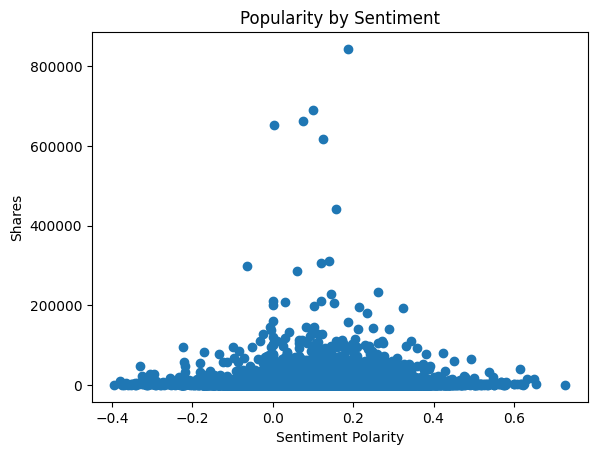

In [ ]:
#a graph of the relationship between sentiment and shares
from matplotlib import pyplot as plt
plt.scatter(news[' global_sentiment_polarity'],news[' shares'])
plt.title('Popularity by Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Shares')
plt.show()

In [ ]:
#use linear regressoin as a prediction method

from sklearn.linear_model import LinearRegression
x = news[' global_sentiment_polarity'].values.reshape(-1,1)
y = news[' shares'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x, y)
print(regressor.coef_)
print(regressor.intercept_)

#shares = 3335.8 + 499.3 · sentiment

[[499.34840588]]
[3335.80329021]


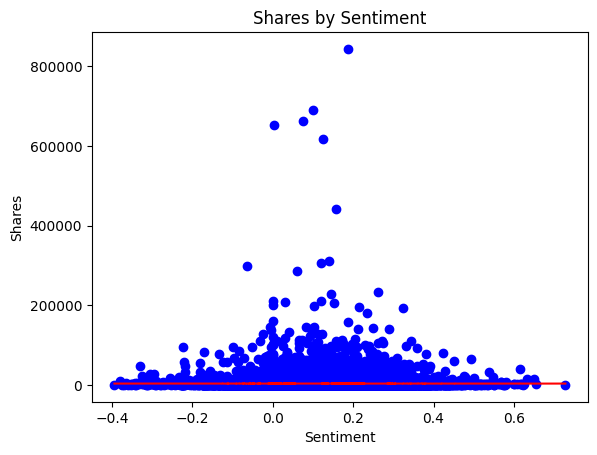

In [ ]:
# plot the regression
regline=regressor.predict(x)
plt.scatter(news[' global_sentiment_polarity'],news[' shares'],color='blue')
plt.plot(sorted(news[' global_sentiment_polarity'].tolist()),regline,'r')
plt.title('Shares by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Shares')
plt.show()

What does the diagram mean?

### K-NN (K nearest neighbors)

If things live in the same neighborhood,
they might be similar to each other.

In [ ]:
#KNN
k=15 #the number of neighbors
newsentiment=0.5

# convert shares to a list
allsentiment=news[' global_sentiment_polarity'].tolist()
allshares=news[' shares'].tolist()

# calculate the distance between an existing article and the new article
distances=[abs(x-newsentiment) for x in allsentiment]

In [ ]:
 # find the nearest neighbors
import numpy as np
idx = np.argsort(distances)
print(idx[0:k])

[30230 22546  7284 13035 29598 19361 36029 30670 25556  6744 26473  7211
  9200 15198 31496]


In [ ]:
nearbyshares=[allshares[i] for i in idx[0:k]]
print(np.mean(nearbyshares))
# articles with sentiment equal to 0.5 get about 7344 social media shares

7344.466666666666


so, a new article with sentiment equal to 0.5 will get about 7344 shares.

### k-NN with sklearn

k-NN is not regression, but why it is called regressor?

Because regression has been a synonym for supervised learning.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
x=np.array(allsentiment).reshape(-1,1)
y=np.array(allshares)
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(x,y)
print(knnregressor.predict(np.array([newsentiment]).reshape(1,-1)))


[7344.46666667]


The output is the same as we do the knn manually.

### other supervised learning algorithms

processes are similar:

1. import the package
2. define a regressor
3. fit the regressor to the data (find the optimized learned function)
4. use the fitted regressor to make a prediction

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(regressor.predict(np.array([newsentiment]).reshape(1,-1)))

[3585.47749315]


In [ ]:
#knn
from sklearn.neighbors import KNeighborsRegressor
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(knnregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[7344.46666667]


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(max_depth=3)
dtregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(dtregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[3978.70776621]


In [ ]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()
rfregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(rfregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[4257.12137446]


In [ ]:
#neural network
from sklearn.neural_network import MLPRegressor
nnregressor = MLPRegressor()
nnregressor.fit(np.array(allsentiment).reshape(-1,1), np.array(allshares))
print(nnregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[3962.98550437]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


which result should we take?

# Measure accuracy

In [ ]:
allprediction=regressor.predict(np.array([allsentiment]).reshape(-1,1))
predictionerror=abs(allprediction-allsentiment)
print(np.mean(predictionerror))

3395.26087436506


In [ ]:
from sklearn.model_selection import train_test_split
x=np.array([allsentiment]).reshape(-1,1)
y=np.array(allshares)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)

In [ ]:
# run the test set for random forest
rfregressor = RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted-testy)
print(np.mean(predictionerror))

3816.4741523079983


In [ ]:
# check the prediction error of our k-NN regressor
knnregressor = KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(trainingx, trainingy)
predicted = knnregressor.predict(testx)
predictionerror = abs(predicted-testy)
print(np.mean(predictionerror))

3292.401883429186


k-NN has better performance than random forests in this test.

External brainstorming: why k = 15?

[how to get the best value of K?](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn)

## Multivariate Models

In [ ]:
# variables: sentiment, tokens, non-stop words
# random forest
x=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y=np.array(allshares)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)

from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx, trainingy)
predicted = rfregressor.predict(testx)
predictionerror = abs(predicted-testy)

In [ ]:
print(np.mean(predictionerror))

3474.431322312199


The multivariate random forest modle performs better than the univariate model.

### Classification

to see if the new article will be above or below the median shares:  high-share / low-share

In [ ]:
themedian=np.median(news[' shares'])
news['abovemedianshares']=1*(news[' shares']>themedian)

In [ ]:
x=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y=np.array(news['abovemedianshares'])
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=15)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)
knnclassifier.fit(trainingx, trainingy)
predicted = knnclassifier.predict(testx)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(testy,predicted))

[[2703 2280]
 [2370 2558]]


true positives    |  false negatives    
false positives  |  true negatives

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(testy,predicted)
recall = recall_score(testy,predicted)
print('precision:', precision)
print('recall:', recall)

precision: 0.5287308805291443
recall: 0.5190746753246753


half half, it's hard to know the number of shares an article will get.